# Tutorial 1

Esse tutorial tem como objetivo explorar os conceitos básicos do Tensorflow. Detalhes de como instalar o TensorFlow podem ser encontrados em: https://www.tensorflow.org/. 

Os seguintes links serviram de referência para este material:

* [Tutorial do Tensorflow](https://www.tensorflow.org/get_started/mnist/beginners)
* [Curso básico do Tensorflow](https://drive.google.com/drive/mobile/folders/0B41Zbb4c8HVyMHlSQlVFWWphNXc)
* [TensorFlow Examples](https://github.com/aymericdamien/TensorFlow-Examples)

O código a seguir permite verificar se o tensorflow foi instalado corretamente. Ele simplesmente imprime a versão que foi instalada (no caso, 1.0.0). Vale destacar que estou utilizando a versão 3.6 do Python.

In [1]:
import tensorflow as tf
tf.__version__

'1.0.0'

 Para entender um pouco do funcionamento do tensorflow, vamos criar a "rede" a seguir: 
 
 <img src="http://adolfo.data2learning.com/ludiico/images/diagrama1.png" />

In [2]:
#Criando os nós:

node1 = tf.constant(3.0, tf.float32) #Cria o nó "a" com o valor 3 do tipo float
node2 = tf.constant(4.0) # Cria o nó "b" com o valor 4 (implicitamente ele também é do tipo float)
node3 = tf.add(node1, node2) # Cria o nó raiz aplicando as operações de soma nos nós a e b

In [3]:
print("node1:", node1, "node2:", node2)
print("node3:", node3)

node1: Tensor("Const:0", shape=(), dtype=float32) node2: Tensor("Const_1:0", shape=(), dtype=float32)
node3: Tensor("Add:0", shape=(), dtype=float32)


In [4]:
#Vamos criar uma seção do TensorFlow para executar as operações necessárias:

sess = tf.Session()
sess.run(node3)

7.0

O workflow de trabalho com o tensorflow pode ser dividio em 3 partes:
 
* Construção do grafo utilizando as operações do Tensorflow **In[3]**
* Alimentar com os dados e executar as operações do grafo (*sess.run(op)*) **In[6]**
* Atualizar as variáveis do grafo (e retornar os valores de saída) **In[6]**

Na primeira solução, criamos o grafo já com os valores pré-definidos. No entanto, é interessante que esses valores sejam alimentados com os valores de entrada. Para isso, vamos criar os **placeholder**. Detalhes sobre **feed** e **placeholder** podem ser encontrados em: https://www.tensorflow.org/programmers_guide/reading_data#feeding

In [5]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

adder_node = a + b # esse comando tem a mesma função de tf.add(node1, node2) do exemplo anterior

print(sess.run(adder_node, feed_dict={a: 3, b: 4}))

7.0


In [6]:
print(sess.run(adder_node, feed_dict={a: [1, 3], b:[2, 4]}))

[ 3.  7.]


Um outro conceito básico importante é o conceito de **Variáveis** no Tensorflow. Quando criamos um modelo, as veriáveis são utilizadas para manter e atualizar os parâmetros deste modelo. Detalhes sobre variáveis podem ser encontrados em: https://www.tensorflow.org/programmers_guide/variables

O exemplo a seguir, mostra brevemente como seria o uso de váriaveis no código. 

In [7]:
# Cria as variáveis 

weights = tf.Variable(tf.random_normal([784, 200], stddev=0.35), name="weights")
biases = tf.Variable(tf.zeros([200]), name="biases")

# Adiciona um operação que inicializa as variáveis que serão utilizadas no modelo 
init_op = tf.global_variables_initializer()

# Quando for rodar o modelo, executa a inicialização das operações

with tf.Session() as sess:
    sess.run(init_op)
    # ... 
    # Use the model 
    # ...

Outro conceito importante é o conceito de **Tensor**. No tensorflow tudo é Tensor (*Everything is Tensor*). Você pode imaginar o **Tensor** como sendo um array n-dimensional ou uma lista. Um tensor possui um tipo estático e a dimensão é determinada de forma dinâmica. Uma observação importante é que apenas *tensors* podem ser passados entre os nós de um grafo no tensorflow. Dealhes podem ser encontrados em: https://www.tensorflow.org/programmers_guide/dims_types

Para ilustrar esses componentes, vamos criar o modelo de regressão linear utilizando o tensorflow:

* Hypothesis

$H(x) = Wx + b$

* Const function

$cost(W, b) = \frac{1}{m}\sum_{i=1}^{m}(H(x^{(i)})-y^{(i)})^2$

* Gradient descent algorithm (treinamento)

In [8]:
# Cosntruindo o grafo utilizando operações do Tensorflow

# Dados de entrada

x_train = [1, 2, 3]
y_train = [1, 2, 3]

# Criando a operação da Hypothesis

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# XW + b

hypothesis = x_train * W + b

In [9]:
# cost function

cost = tf.reduce_mean(tf.square(hypothesis - y_train))

In [10]:
# Gradient Descent

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

Uma vez que o modelo foi criado, o próximo passo é executar, atualizar o grafo e pegar o resultado final. 

In [11]:
# Criar a sessão do grafo

sess = tf.Session()

# Inicializa as variáveis no grafo
sess.run(tf.global_variables_initializer())

#Treinamento

for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 12.6063 [-0.8084482] [ 0.38796654]
20 0.241132 [ 0.45362398] [ 0.88753384]
40 0.117379 [ 0.59138256] [ 0.89512765]
60 0.105685 [ 0.62125826] [ 0.85775471]
80 0.0959761 [ 0.64007396] [ 0.81789047]
100 0.0871669 [ 0.6570859] [ 0.77949518]
120 0.0791664 [ 0.67321074] [ 0.74286598]
140 0.0719002 [ 0.68856955] [ 0.70795435]
160 0.0653009 [ 0.70320576] [ 0.67468315]
180 0.0593073 [ 0.71715397] [ 0.64297551]
200 0.0538639 [ 0.7304467] [ 0.6127581]
220 0.04892 [ 0.74311477] [ 0.58396059]
240 0.0444299 [ 0.75518733] [ 0.55651665]
260 0.040352 [ 0.7666927] [ 0.53036243]
280 0.0366483 [ 0.77765733] [ 0.50543731]
300 0.0332846 [ 0.7881065] [ 0.4816837]
320 0.0302296 [ 0.79806477] [ 0.45904633]
340 0.027455 [ 0.80755496] [ 0.43747288]
360 0.0249351 [ 0.81659919] [ 0.41691321]
380 0.0226464 [ 0.82521826] [ 0.39731982]
400 0.0205679 [ 0.83343238] [ 0.3786473]
420 0.01868 [ 0.84126055] [ 0.36085227]
440 0.0169655 [ 0.84872067] [ 0.34389353]
460 0.0154084 [ 0.85583025] [ 0.32773176]
480 0.0139941 [ 0

Vamos exibir os dados originais e o modelo treinado. 

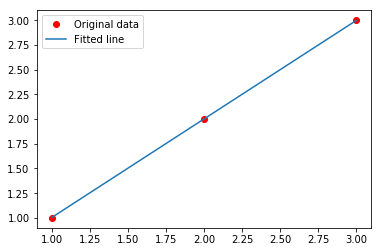

In [16]:
import matplotlib.pyplot as plt

#Graphic display
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, sess.run(W) * x_train + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

Vamos mudar nossa implementação para fazer uso dos conceito de **PlaceHolder**. Desta forma podemos "alimentar" nosso modelo com os dados. Nessa etapa vamos utilizar mais dados. As listas a seguir e o gráfico mostram os dados e sua distribuição. 

    x_train = [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167, 7.042,10.791,5.313,7.997,5.654,9.27,3.1]
    
    y_train = [1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 2.827,3.465,1.65,2.904,2.42,2.94,1.3]
    


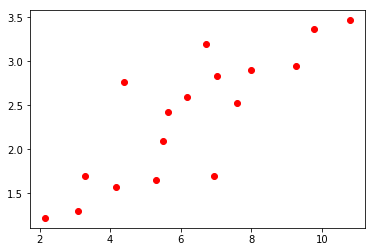

In [17]:
x_train = [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1]
y_train = [1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3]

plt.plot(x_train, y_train, 'ro', label='Original data')
plt.show()

In [18]:
# Modelo completo utilizando o placeholder

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    sess.run(train, feed_dict={X: x_train, Y: y_train})
    if step % 20 == 0:
        print(step, sess.run(cost, feed_dict={X: x_train, Y: y_train}), 
              sess.run(W), sess.run(b))

0 0.370487 [ 0.37131417] [-0.31831747]
20 0.292726 [ 0.40102664] [-0.26031876]
40 0.27986 [ 0.39393809] [-0.21006398]
60 0.268186 [ 0.38718587] [-0.16219382]
80 0.257594 [ 0.38075405] [-0.11659507]
100 0.247983 [ 0.37462738] [-0.07315994]
120 0.239263 [ 0.36879146] [-0.0317858]
140 0.23135 [ 0.36323243] [ 0.00762516]
160 0.224171 [ 0.35793719] [ 0.04516608]
180 0.217656 [ 0.35289317] [ 0.0809257]
200 0.211746 [ 0.34808856] [ 0.11498857]
220 0.206382 [ 0.34351188] [ 0.14743516]
240 0.201516 [ 0.33915237] [ 0.17834216]
260 0.197101 [ 0.33499968] [ 0.20778264]
280 0.193094 [ 0.33104408] [ 0.23582621]
300 0.189459 [ 0.32727614] [ 0.26253909]
320 0.186161 [ 0.32368702] [ 0.28798449]
340 0.183168 [ 0.32026818] [ 0.31222245]
360 0.180452 [ 0.31701156] [ 0.33531034]
380 0.177988 [ 0.31390947] [ 0.3573027]
400 0.175753 [ 0.3109546] [ 0.37825158]
420 0.173724 [ 0.30813989] [ 0.3982065]
440 0.171884 [ 0.30545875] [ 0.41721457]
460 0.170214 [ 0.30290484] [ 0.43532073]
480 0.168698 [ 0.30047211] [ 

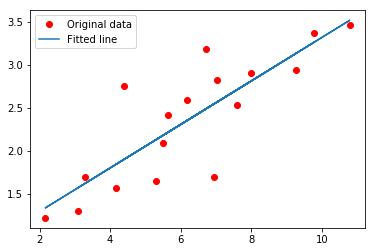

In [19]:
#Graphic display
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, sess.run(W) * x_train + sess.run(b), label='Fitted line')
plt.legend()
plt.show()